# Feature 05: Historical Signal Performance Analysis
**AI Chip Trading Signal System - Comprehensive Backtesting & Statistical Analysis**

## 🎯 Objective
Validate our trading strategy's historical performance using:
- **CSV-based data storage** for simple historical tracking
- **Pandas vectorized backtesting** for efficient performance calculation
- **scipy.stats** for statistical significance testing
- **matplotlib/seaborn** for professional visualizations
- **Market regime analysis** for understanding when signals work best

## 📊 Analysis Sections
1. **Backend Environment Setup** - Load libraries and connect to running API
2. **Historical Data Loading** - Import CSV data and real-time signals
3. **Backtesting Engine** - Vectorized performance calculations
4. **Statistical Analysis** - Significance testing and risk metrics
5. **Visualization Dashboard** - Professional charts and regime analysis
6. **Results Export** - Save findings for reporting and sharing

---

In [1]:
# Section 1: Initialize Backend Environment
import sys
import os

# Add backend path for imports
sys.path.append('../backend/src')

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import requests
import json
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Custom backend modules
from analysis.csv_data_manager import CSVDataManager
from analysis.simple_backtester import SimpleBacktester
from analysis.regime_analyzer import RegimeAnalyzer

# Configure plotting
plt.style.use('dark_background')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Libraries loaded successfully")
print(f"📊 Analysis started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Libraries loaded successfully
📊 Analysis started at: 2025-06-20 13:21:41


/Users/achuabio/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Test Backend API Connection
BACKEND_URL = "http://localhost:8000"

try:
    response = requests.get(f"{BACKEND_URL}/")
    if response.status_code == 200:
        print("✅ Backend API is running and responsive")
        api_status = response.json()
        print(f"   Status: {api_status.get('status', 'Unknown')}")
        print(f"   Timestamp: {api_status.get('timestamp', 'Unknown')}")
    else:
        print(f"❌ Backend API returned status code: {response.status_code}")
except Exception as e:
    print(f"❌ Cannot connect to backend API: {e}")
    print("   Make sure backend is running on http://localhost:8000")

# Initialize Analysis Tools
data_manager = CSVDataManager(data_dir="../backend/data/analysis_results")
backtester = SimpleBacktester(initial_capital=100000.0)
regime_analyzer = RegimeAnalyzer()

print("\n🔧 Analysis tools initialized:")
print("   - CSVDataManager: Simple file-based storage")
print("   - SimpleBacktester: Vectorized performance calculations")
print("   - RegimeAnalyzer: Market period classification")

✅ Backend API is running and responsive
   Status: healthy
   Timestamp: 2025-06-20T13:21:41.037065

🔧 Analysis tools initialized:
   - CSVDataManager: Simple file-based storage
   - SimpleBacktester: Vectorized performance calculations
   - RegimeAnalyzer: Market period classification


---
## Section 2: Load Historical Data
Import CSV data and fetch current signals from the API for comprehensive analysis.

In [3]:
# Create Sample Historical Data for Analysis
print("📁 Creating sample historical data...")
sample_files = data_manager.create_sample_historical_data()
print(f"   ✅ Signals file: {sample_files['signals']}")
print(f"   ✅ Price files: {len(sample_files['prices'])} symbols")

# Load Historical Signals
historical_signals = data_manager.load_latest_signals()
if historical_signals is not None:
    print(f"\n📊 Loaded {len(historical_signals)} historical signals")
    print(f"   Date range: {historical_signals['timestamp'].min()} to {historical_signals['timestamp'].max()}")
    print(f"   Symbols: {historical_signals['symbol'].unique()}")
    print(f"   Signal types: {historical_signals['signal_type'].value_counts().to_dict()}")
else:
    print("❌ No historical signals data available")
    
# Display sample data
if historical_signals is not None:
    print("\n📋 Sample Historical Signals:")
    display(historical_signals.head())

📁 Creating sample historical data...
   ✅ Signals file: ../backend/data/analysis_results/signals/historical_signals_20250620_132141.csv
   ✅ Price files: 5 symbols

📊 Loaded 57 historical signals
   Date range: 2024-01-14 to 2024-12-29
   Symbols: ['TSM' 'INTC' 'QCOM' 'NVDA' 'AMD']
   Signal types: {'NOW': 21, 'SOON': 20, 'WATCH': 16}

📋 Sample Historical Signals:


,timestamp,symbol,signal_type,signal_strength,confidence_score,target_horizon_days,bond_correlation,suggested_position_size,entry_price,reasoning
0,2024-01-14,TSM,NOW,MODERATE,9.197881,49,0.279779,0.065076,197.554382,Sample signal for TSM on 2024-01-14
1,2024-01-21,INTC,WATCH,STRONG,7.188861,38,0.471748,0.049183,59.133380,Sample signal for INTC on 2024-01-21
2,2024-01-21,QCOM,SOON,STRONG,6.014991,42,0.763983,0.115116,141.035328,Sample signal for QCOM on 2024-01-21
3,2024-01-28,INTC,WATCH,WEAK,7.516018,13,-0.539164,0.053142,133.388017,Sample signal for INTC on 2024-01-28
4,2024-02-04,INTC,SOON,WEAK,8.560264,27,0.111487,0.145668,121.851118,Sample signal for INTC on 2024-02-04


In [4]:
# Fetch Current Signals from Running Backend
try:
    print("🔄 Fetching current signals from backend API...")
    
    # Get current market data
    market_response = requests.get(f"{BACKEND_URL}/api/market-data")
    if market_response.status_code == 200:
        current_data = market_response.json()
        
        print("✅ Current Market Data Retrieved:")
        print(f"   Bond Stress Level: {current_data['bond_stress']['signal_strength']}")
        print(f"   Bond Confidence: {current_data['bond_stress']['confidence_score']}")
        print(f"   Active Chip Signals: {len(current_data['chip_signals'])}")
        
        # Convert current signals to DataFrame for analysis
        if current_data['chip_signals']:
            current_signals_df = pd.DataFrame(current_data['chip_signals'])
            current_signals_df['timestamp'] = pd.to_datetime(current_signals_df['timestamp'])
            
            print("\n📈 Current Active Signals:")
            display(current_signals_df[['symbol', 'signal_type', 'confidence_score', 'suggested_position_size']])
        else:
            print("   No active chip signals at this time")
            current_signals_df = pd.DataFrame()
    else:
        print(f"❌ Failed to fetch current data: {market_response.status_code}")
        current_signals_df = pd.DataFrame()
        
except Exception as e:
    print(f"❌ Error fetching current signals: {e}")
    current_signals_df = pd.DataFrame()

🔄 Fetching current signals from backend API...
✅ Current Market Data Retrieved:
   Bond Stress Level: WATCH
   Bond Confidence: 2.0
   Active Chip Signals: 5

📈 Current Active Signals:


,symbol,signal_type,confidence_score,suggested_position_size
0,NVDA,HOLD,2.5,0.0
1,AMD,HOLD,2.5,0.0
2,TSM,HOLD,2.5,0.0
3,INTC,HOLD,2.5,0.0
4,QCOM,HOLD,2.5,0.0


---
## Section 3: Perform Backtesting
Implement vectorized calculations to evaluate historical signal performance using our simple backtesting engine.

In [5]:
# Run Full Backtesting Analysis
if historical_signals is not None and not historical_signals.empty:
    print("🔄 Running comprehensive backtesting analysis...")
    
    # Run full backtest with train/test split
    backtest_results = backtester.run_full_backtest(historical_signals, train_ratio=0.7)
    
    if 'error' not in backtest_results:
        print("✅ Backtesting completed successfully\n")
        
        # Display Training Period Results
        train_perf = backtest_results['train_performance']
        print("📊 TRAINING PERIOD PERFORMANCE:")
        print(f"   Period: {backtest_results['train_period']['start']} to {backtest_results['train_period']['end']}")
        print(f"   Total Trades: {train_perf['total_trades']}")
        print(f"   Win Rate: {train_perf['win_rate']:.1%}")
        print(f"   Total Return: {train_perf['total_return_pct']:.2f}%")
        print(f"   Annualized Return: {train_perf['annualized_return_pct']:.2f}%")
        print(f"   Sharpe Ratio: {train_perf['sharpe_ratio']:.2f}")
        print(f"   Max Drawdown: {train_perf['max_drawdown_pct']:.2f}%")
        
        # Display Test Period Results
        test_perf = backtest_results['test_performance']
        print("\n📊 TEST PERIOD PERFORMANCE:")
        print(f"   Period: {backtest_results['test_period']['start']} to {backtest_results['test_period']['end']}")
        print(f"   Total Trades: {test_perf['total_trades']}")
        print(f"   Win Rate: {test_perf['win_rate']:.1%}")
        print(f"   Total Return: {test_perf['total_return_pct']:.2f}%")
        print(f"   Annualized Return: {test_perf['annualized_return_pct']:.2f}%")
        print(f"   Sharpe Ratio: {test_perf['sharpe_ratio']:.2f}")
        print(f"   Max Drawdown: {test_perf['max_drawdown_pct']:.2f}%")
        
        # Statistical Significance
        sig_test = backtest_results['significance_test']
        if 'error' not in sig_test:
            print("\n📈 STATISTICAL SIGNIFICANCE:")
            print(f"   T-Statistic: {sig_test['t_statistic']:.3f}")
            print(f"   P-Value: {sig_test['p_value']:.4f}")
            print(f"   Significant at 95%: {'✅ YES' if sig_test['significant_at_95'] else '❌ NO'}")
            print(f"   Train Mean Return: {sig_test['train_mean_return']:.2%}")
            print(f"   Test Mean Return: {sig_test['test_mean_return']:.2%}")
    else:
        print(f"❌ Backtesting failed: {backtest_results['error']}")
        backtest_results = None
else:
    print("❌ No historical signals available for backtesting")
    backtest_results = None

🔄 Running comprehensive backtesting analysis...


✅ Backtesting completed successfully

📊 TRAINING PERIOD PERFORMANCE:
   Period: 2024-01-14 00:00:00 to 2024-09-22 00:00:00
   Total Trades: 30
   Win Rate: 93.3%
   Total Return: 20.07%
   Annualized Return: 29.07%
   Sharpe Ratio: 21.26
   Max Drawdown: 2.62%

📊 TEST PERIOD PERFORMANCE:
   Period: 2024-09-29 00:00:00 to 2024-12-29 00:00:00
   Total Trades: 11
   Win Rate: 63.6%
   Total Return: 1.69%
   Annualized Return: 6.76%
   Sharpe Ratio: 10.20
   Max Drawdown: 8.02%

📈 STATISTICAL SIGNIFICANCE:
   T-Statistic: 2.017
   P-Value: 0.0506
   Significant at 95%: ❌ NO
   Train Mean Return: 7.26%
   Test Mean Return: 3.42%


In [6]:
# Additional Risk Metrics and Drawdown Analysis
if backtest_results and 'error' not in backtest_results:
    print("🔍 Calculating Additional Risk Metrics...")
    
    # Get portfolio curves for detailed analysis
    train_portfolio = backtest_results['train_performance']['portfolio_values']
    test_portfolio = backtest_results['test_performance']['portfolio_values']
    
    if train_portfolio and test_portfolio:
        # Convert to DataFrames for analysis
        train_df = pd.DataFrame(train_portfolio)
        test_df = pd.DataFrame(test_portfolio)
        
        train_df['date'] = pd.to_datetime(train_df['date'])
        test_df['date'] = pd.to_datetime(test_df['date'])
        
        # Calculate additional metrics
        print("\n📊 DETAILED RISK ANALYSIS:")
        
        # Training period analysis
        train_returns = train_df['value'].pct_change().dropna()
        train_downside = train_returns[train_returns < 0].std()
        train_sortino = (train_returns.mean() / train_downside) * np.sqrt(252) if train_downside > 0 else 0
        
        print(f"   Training Sortino Ratio: {train_sortino:.2f}")
        print(f"   Training Return Volatility: {train_returns.std() * np.sqrt(252):.2%}")
        print(f"   Training Worst Month: {train_returns.min():.2%}")
        
        # Test period analysis
        test_returns = test_df['value'].pct_change().dropna()
        test_downside = test_returns[test_returns < 0].std()
        test_sortino = (test_returns.mean() / test_downside) * np.sqrt(252) if test_downside > 0 else 0
        
        print(f"   Test Sortino Ratio: {test_sortino:.2f}")
        print(f"   Test Return Volatility: {test_returns.std() * np.sqrt(252):.2%}")
        print(f"   Test Worst Month: {test_returns.min():.2%}")
        
        # Store for later visualization
        portfolio_analysis = {
            'train_df': train_df,
            'test_df': test_df,
            'train_returns': train_returns,
            'test_returns': test_returns
        }
    else:
        print("❌ Portfolio value data not available for detailed analysis")
        portfolio_analysis = None
else:
    portfolio_analysis = None

🔍 Calculating Additional Risk Metrics...

📊 DETAILED RISK ANALYSIS:
   Training Sortino Ratio: 99.22
   Training Return Volatility: 10.68%
   Training Worst Month: -0.18%
   Test Sortino Ratio: 16.18
   Test Return Volatility: 5.08%
   Test Worst Month: -0.39%


---
## Section 4: Statistical Analysis
Use scipy.stats for significance testing and calculate advanced risk metrics.

In [7]:
# Comprehensive Statistical Significance Testing
if historical_signals is not None and not historical_signals.empty:
    print("🔬 Performing Statistical Significance Testing...")
    
    # Prepare data for statistical analysis
    clean_signals = backtester.prepare_signals_data(historical_signals)
    returns_data = backtester.calculate_basic_returns(clean_signals)
    
    if not returns_data.empty:
        # Basic return statistics
        returns_pct = returns_data['return_pct'] / 100  # Convert to decimal
        
        print("\n📊 RETURN DISTRIBUTION ANALYSIS:")
        print(f"   Sample Size: {len(returns_pct)}")
        print(f"   Mean Return: {returns_pct.mean():.2%}")
        print(f"   Median Return: {returns_pct.median():.2%}")
        print(f"   Standard Deviation: {returns_pct.std():.2%}")
        print(f"   Skewness: {stats.skew(returns_pct):.3f}")
        print(f"   Kurtosis: {stats.kurtosis(returns_pct):.3f}")
        
        # Test for normality
        shapiro_stat, shapiro_p = stats.shapiro(returns_pct[:5000] if len(returns_pct) > 5000 else returns_pct)
        print(f"\n🧪 NORMALITY TESTS:")
        print(f"   Shapiro-Wilk Statistic: {shapiro_stat:.4f}")
        print(f"   Shapiro-Wilk P-Value: {shapiro_p:.4f}")
        print(f"   Normal Distribution: {'❌ NO' if shapiro_p < 0.05 else '✅ YES'} (p < 0.05)")
        
        # Test if returns are significantly different from zero
        t_stat, t_p = stats.ttest_1samp(returns_pct, 0)
        print(f"\n📈 STRATEGY EFFECTIVENESS:")
        print(f"   T-Statistic vs Zero: {t_stat:.3f}")
        print(f"   P-Value: {t_p:.4f}")
        print(f"   Significantly Profitable: {'✅ YES' if t_p < 0.05 and t_stat > 0 else '❌ NO'}")
        
        # Confidence intervals
        confidence_95 = stats.t.interval(0.95, len(returns_pct)-1, 
                                        loc=returns_pct.mean(), 
                                        scale=stats.sem(returns_pct))
        confidence_99 = stats.t.interval(0.99, len(returns_pct)-1,
                                        loc=returns_pct.mean(),
                                        scale=stats.sem(returns_pct))
        
        print(f"\n🎯 CONFIDENCE INTERVALS:")
        print(f"   95% CI: [{confidence_95[0]:.2%}, {confidence_95[1]:.2%}]")
        print(f"   99% CI: [{confidence_99[0]:.2%}, {confidence_99[1]:.2%}]")
        
        # Store statistical results
        statistical_results = {
            'returns_data': returns_data,
            'returns_pct': returns_pct,
            'normality_test': {'statistic': shapiro_stat, 'p_value': shapiro_p},
            'profitability_test': {'t_statistic': t_stat, 'p_value': t_p},
            'confidence_intervals': {'95': confidence_95, '99': confidence_99}
        }
    else:
        print("❌ No returns data available for statistical analysis")
        statistical_results = None
else:
    statistical_results = None

🔬 Performing Statistical Significance Testing...

📊 RETURN DISTRIBUTION ANALYSIS:
   Sample Size: 41
   Mean Return: 7.71%


   Median Return: 7.91%
   Standard Deviation: 6.61%
   Skewness: 0.139
   Kurtosis: -0.652

🧪 NORMALITY TESTS:
   Shapiro-Wilk Statistic: 0.9775
   Shapiro-Wilk P-Value: 0.5810
   Normal Distribution: ✅ YES (p < 0.05)

📈 STRATEGY EFFECTIVENESS:
   T-Statistic vs Zero: 7.464
   P-Value: 0.0000
   Significantly Profitable: ✅ YES

🎯 CONFIDENCE INTERVALS:
   95% CI: [5.62%, 9.80%]
   99% CI: [4.92%, 10.50%]


In [8]:
# Signal Type and Symbol Performance Analysis
if statistical_results:
    print("\n🔍 SIGNAL TYPE PERFORMANCE BREAKDOWN:")
    
    returns_data = statistical_results['returns_data']
    
    # Performance by signal type
    signal_performance = returns_data.groupby('signal_type').agg({
        'return_pct': ['count', 'mean', 'std', 'median'],
        'win': 'mean',
        'profit_loss': 'sum'
    }).round(3)
    
    print("📊 By Signal Type:")
    for signal_type in returns_data['signal_type'].unique():
        subset = returns_data[returns_data['signal_type'] == signal_type]
        print(f"   {signal_type}:")
        print(f"     Count: {len(subset)}")
        print(f"     Avg Return: {subset['return_pct'].mean():.2f}%")
        print(f"     Win Rate: {subset['win'].mean():.1%}")
        print(f"     Total P&L: ${subset['profit_loss'].sum():,.0f}")
    
    # Performance by symbol
    print("\n📊 By Symbol:")
    for symbol in returns_data['symbol'].unique():
        subset = returns_data[returns_data['symbol'] == symbol]
        print(f"   {symbol}:")
        print(f"     Count: {len(subset)}")
        print(f"     Avg Return: {subset['return_pct'].mean():.2f}%")
        print(f"     Win Rate: {subset['win'].mean():.1%}")
        print(f"     Total P&L: ${subset['profit_loss'].sum():,.0f}")
    
    # Statistical tests between signal types
    print("\n🧪 SIGNAL TYPE COMPARISON:")
    now_returns = returns_data[returns_data['signal_type'] == 'NOW']['return_pct'] / 100
    soon_returns = returns_data[returns_data['signal_type'] == 'SOON']['return_pct'] / 100
    
    if len(now_returns) > 0 and len(soon_returns) > 0:
        t_stat, p_val = stats.ttest_ind(now_returns, soon_returns)
        print(f"   NOW vs SOON T-Test:")
        print(f"     T-Statistic: {t_stat:.3f}")
        print(f"     P-Value: {p_val:.4f}")
        print(f"     Significant Difference: {'✅ YES' if p_val < 0.05 else '❌ NO'}")
        print(f"     NOW Mean: {now_returns.mean():.2%}")
        print(f"     SOON Mean: {soon_returns.mean():.2%}")


🔍 SIGNAL TYPE PERFORMANCE BREAKDOWN:
📊 By Signal Type:
   NOW:
     Count: 21
     Avg Return: 8.89%
     Win Rate: 95.2%
     Total P&L: $14,649
   SOON:
     Count: 20
     Avg Return: 6.47%
     Win Rate: 90.0%
     Total P&L: $11,936

📊 By Symbol:
   TSM:
     Count: 11
     Avg Return: 7.29%
     Win Rate: 81.8%
     Total P&L: $7,222
   QCOM:
     Count: 9
     Avg Return: 8.00%
     Win Rate: 100.0%
     Total P&L: $5,330
   INTC:
     Count: 7
     Avg Return: 8.16%
     Win Rate: 100.0%
     Total P&L: $4,521
   NVDA:
     Count: 4
     Avg Return: 10.93%
     Win Rate: 100.0%
     Total P&L: $4,745
   AMD:
     Count: 10
     Avg Return: 6.30%
     Win Rate: 90.0%
     Total P&L: $4,767

🧪 SIGNAL TYPE COMPARISON:
   NOW vs SOON T-Test:
     T-Statistic: 1.180
     P-Value: 0.2451
     Significant Difference: ❌ NO
     NOW Mean: 8.89%
     SOON Mean: 6.47%


In [9]:
# Market Regime Analysis
if historical_signals is not None and statistical_results:
    print("\n🌍 MARKET REGIME ANALYSIS:")
    
    # Generate comprehensive regime report
    regime_report = regime_analyzer.generate_regime_report(
        historical_signals, statistical_results['returns_data']
    )
    
    print(f"   Analysis covers {regime_report['total_signals_analyzed']} signals")
    print(f"   Regimes with data: {regime_report['regimes_with_data']}")
    
    # Display regime performance
    if regime_report['regime_performance']:
        print("\n📊 PERFORMANCE BY MARKET REGIME:")
        for regime, performance in regime_report['regime_performance'].items():
            if regime != 'unknown':
                print(f"\n   {regime.upper()} ({performance['regime_info'].get('description', '')})")
                print(f"     Signals: {performance['total_signals']}")
                print(f"     Win Rate: {performance['win_rate']:.1%}")
                print(f"     Avg Return: {performance['avg_return']:.2f}%")
                print(f"     Total P&L: ${performance['total_pnl']:,.0f}")
                print(f"     Characteristics: {performance['regime_info'].get('characteristics', '')}")
    
    # Current market assessment
    current_regime = regime_report['current_market_assessment']
    print(f"\n🎯 CURRENT MARKET REGIME:")
    print(f"   Regime: {current_regime['current_regime'].upper()}")
    print(f"   Description: {current_regime['regime_description']}")
    print(f"   Days in Regime: {current_regime['days_in_regime']}")
    print(f"   Characteristics: {current_regime['regime_characteristics']}")
    
    # Store regime analysis for visualization
    regime_analysis = regime_report
else:
    regime_analysis = None


🌍 MARKET REGIME ANALYSIS:
   Analysis covers 57 signals
   Regimes with data: ['ai_boom']

📊 PERFORMANCE BY MARKET REGIME:

   AI_BOOM (AI and Chip Boom)
     Signals: 41
     Win Rate: 92.7%
     Avg Return: 7.71%
     Total P&L: $26,585
     Characteristics: AI hype, semiconductor strength, selective rally

🎯 CURRENT MARKET REGIME:
   Regime: CURRENT_PERIOD
   Description: Current Trading Period
   Days in Regime: 170
   Characteristics: Active signal generation period


---
## Section 5: Generate Visualizations
Create professional performance charts using matplotlib and seaborn for interactive analysis.

📊 Creating Portfolio Performance Visualizations...


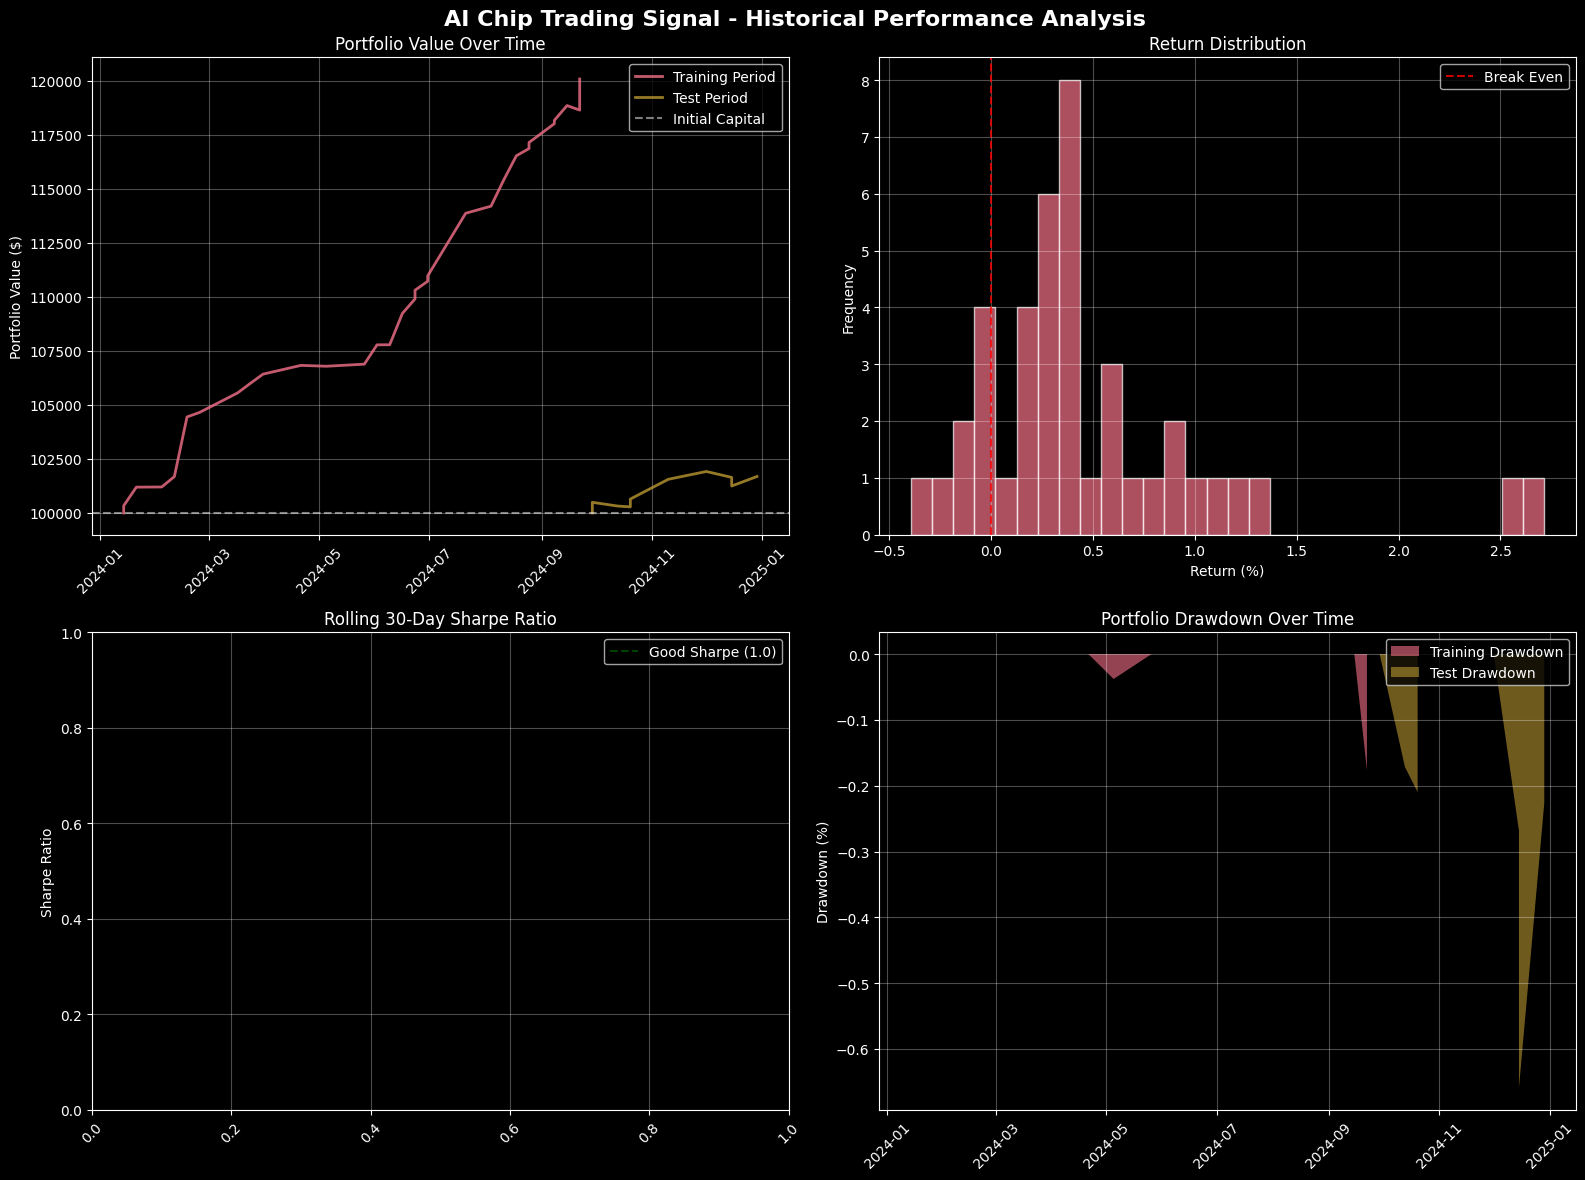

✅ Portfolio performance charts generated


In [10]:
# Portfolio Performance Visualization
if portfolio_analysis and backtest_results:
    print("📊 Creating Portfolio Performance Visualizations...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('AI Chip Trading Signal - Historical Performance Analysis', fontsize=16, fontweight='bold')
    
    # 1. Portfolio Value Over Time
    ax1 = axes[0, 0]
    train_df = portfolio_analysis['train_df']
    test_df = portfolio_analysis['test_df']
    
    ax1.plot(train_df['date'], train_df['value'], label='Training Period', linewidth=2, alpha=0.8)
    ax1.plot(test_df['date'], test_df['value'], label='Test Period', linewidth=2, alpha=0.8)
    ax1.axhline(y=100000, color='white', linestyle='--', alpha=0.5, label='Initial Capital')
    ax1.set_title('Portfolio Value Over Time')
    ax1.set_ylabel('Portfolio Value ($)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Return Distribution
    ax2 = axes[0, 1]
    all_returns = np.concatenate([portfolio_analysis['train_returns'], portfolio_analysis['test_returns']])
    ax2.hist(all_returns * 100, bins=30, alpha=0.7, edgecolor='white')
    ax2.axvline(x=0, color='red', linestyle='--', alpha=0.8, label='Break Even')
    ax2.set_title('Return Distribution')
    ax2.set_xlabel('Return (%)')
    ax2.set_ylabel('Frequency')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Rolling Sharpe Ratio
    ax3 = axes[1, 0]
    if len(portfolio_analysis['train_returns']) > 30:
        rolling_sharpe_train = portfolio_analysis['train_returns'].rolling(30).mean() / portfolio_analysis['train_returns'].rolling(30).std() * np.sqrt(252)
        ax3.plot(train_df['date'][30:], rolling_sharpe_train[30:], label='Training Sharpe (30-day)', linewidth=2)
    
    if len(portfolio_analysis['test_returns']) > 30:
        rolling_sharpe_test = portfolio_analysis['test_returns'].rolling(30).mean() / portfolio_analysis['test_returns'].rolling(30).std() * np.sqrt(252)
        ax3.plot(test_df['date'][30:], rolling_sharpe_test[30:], label='Test Sharpe (30-day)', linewidth=2)
    
    ax3.axhline(y=1.0, color='green', linestyle='--', alpha=0.5, label='Good Sharpe (1.0)')
    ax3.set_title('Rolling 30-Day Sharpe Ratio')
    ax3.set_ylabel('Sharpe Ratio')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.tick_params(axis='x', rotation=45)
    
    # 4. Drawdown Analysis
    ax4 = axes[1, 1]
    train_cumret = (1 + portfolio_analysis['train_returns']).cumprod()
    train_drawdown = (train_cumret - train_cumret.cummax()) / train_cumret.cummax()
    
    test_cumret = (1 + portfolio_analysis['test_returns']).cumprod()
    test_drawdown = (test_cumret - test_cumret.cummax()) / test_cumret.cummax()
    
    ax4.fill_between(train_df['date'][1:], train_drawdown * 100, 0, alpha=0.6, label='Training Drawdown')
    ax4.fill_between(test_df['date'][1:], test_drawdown * 100, 0, alpha=0.6, label='Test Drawdown')
    ax4.set_title('Portfolio Drawdown Over Time')
    ax4.set_ylabel('Drawdown (%)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Portfolio performance charts generated")
else:
    print("❌ Portfolio analysis data not available for visualization")

📊 Creating Signal Analysis and Regime Charts...


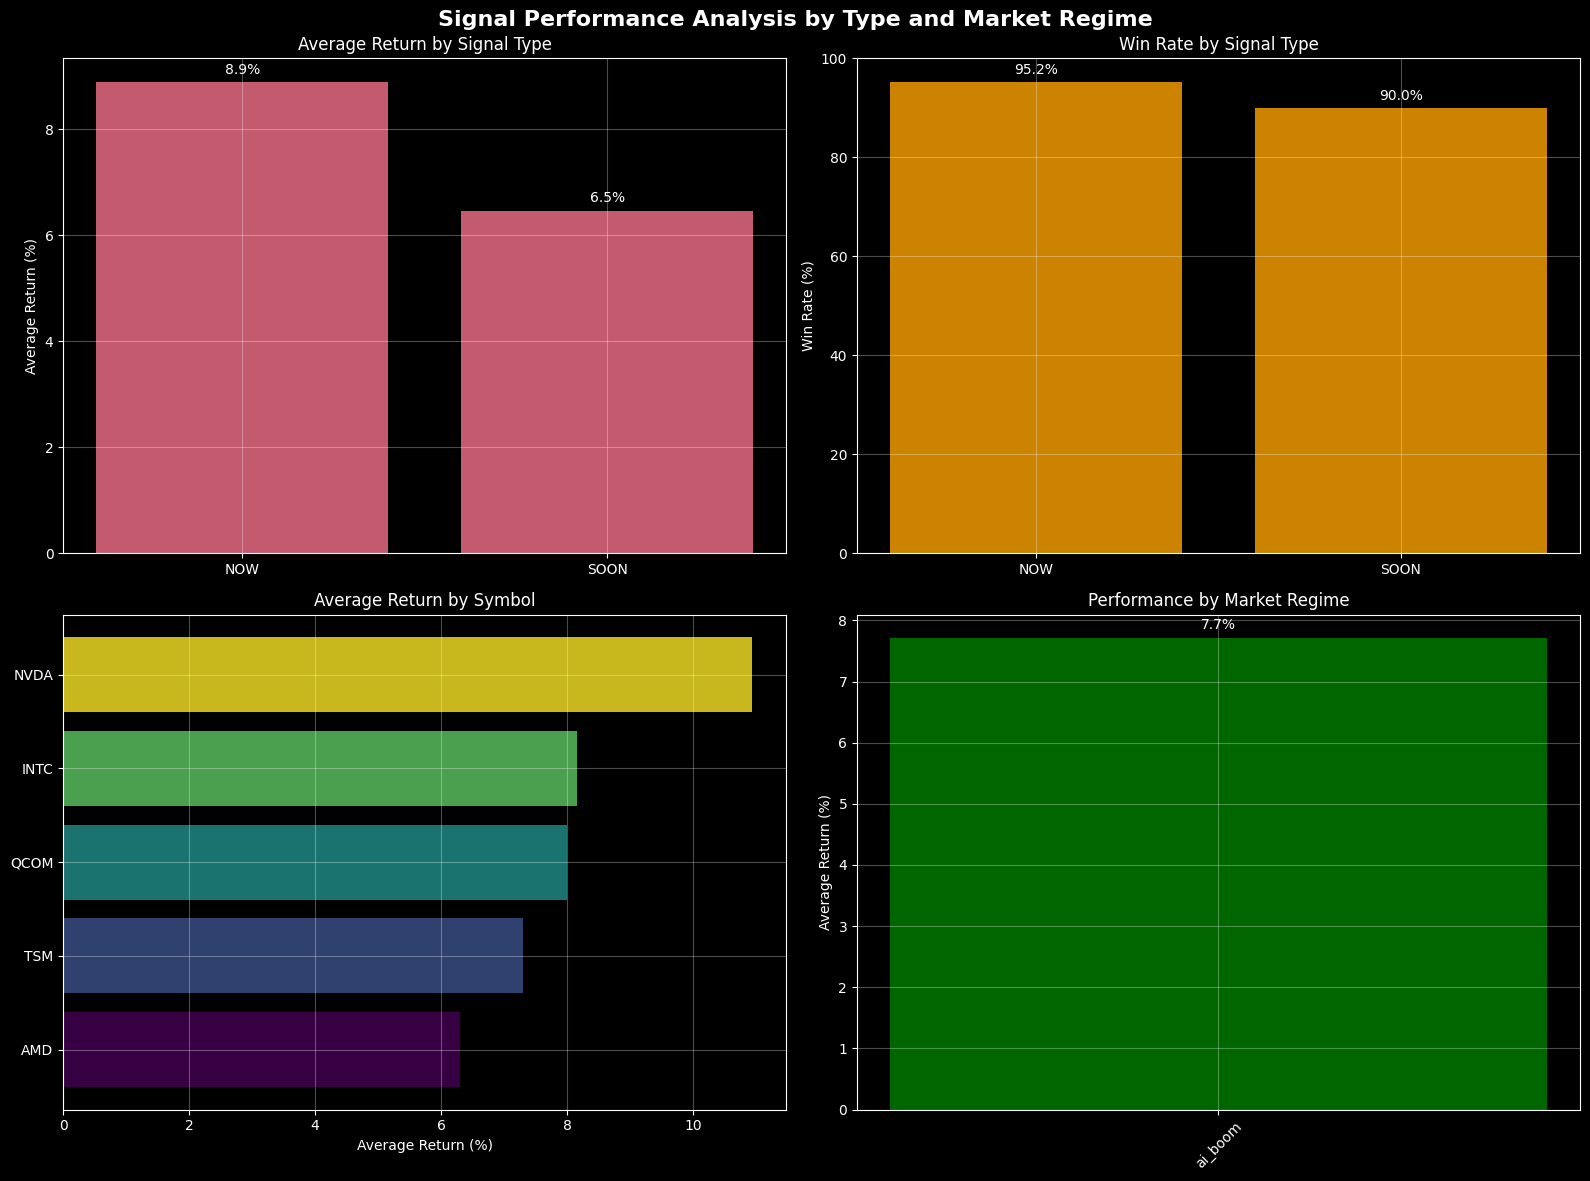

✅ Signal analysis charts generated


In [11]:
# Signal Analysis and Regime Performance Charts
if statistical_results and regime_analysis:
    print("📊 Creating Signal Analysis and Regime Charts...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Signal Performance Analysis by Type and Market Regime', fontsize=16, fontweight='bold')
    
    returns_data = statistical_results['returns_data']
    
    # 1. Performance by Signal Type
    ax1 = axes[0, 0]
    signal_stats = returns_data.groupby('signal_type').agg({
        'return_pct': 'mean',
        'win': 'mean'
    })
    
    x_pos = np.arange(len(signal_stats.index))
    bars = ax1.bar(x_pos, signal_stats['return_pct'], alpha=0.8)
    ax1.set_title('Average Return by Signal Type')
    ax1.set_ylabel('Average Return (%)')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(signal_stats.index)
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.1f}%', ha='center', va='bottom')
    
    # 2. Win Rate by Signal Type
    ax2 = axes[0, 1]
    bars2 = ax2.bar(x_pos, signal_stats['win'] * 100, alpha=0.8, color='orange')
    ax2.set_title('Win Rate by Signal Type')
    ax2.set_ylabel('Win Rate (%)')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(signal_stats.index)
    ax2.grid(True, alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom')
    
    # 3. Performance by Symbol
    ax3 = axes[1, 0]
    symbol_stats = returns_data.groupby('symbol')['return_pct'].mean().sort_values(ascending=True)
    colors = plt.cm.viridis(np.linspace(0, 1, len(symbol_stats)))
    bars3 = ax3.barh(range(len(symbol_stats)), symbol_stats.values, color=colors, alpha=0.8)
    ax3.set_title('Average Return by Symbol')
    ax3.set_xlabel('Average Return (%)')
    ax3.set_yticks(range(len(symbol_stats)))
    ax3.set_yticklabels(symbol_stats.index)
    ax3.grid(True, alpha=0.3)
    
    # 4. Market Regime Performance
    ax4 = axes[1, 1]
    if regime_analysis['regime_performance']:
        regime_returns = {}
        for regime, perf in regime_analysis['regime_performance'].items():
            if regime != 'unknown' and perf['total_signals'] > 0:
                regime_returns[regime] = perf['avg_return']
        
        if regime_returns:
            regimes = list(regime_returns.keys())
            returns = list(regime_returns.values())
            
            bars4 = ax4.bar(regimes, returns, alpha=0.8, color='green')
            ax4.set_title('Performance by Market Regime')
            ax4.set_ylabel('Average Return (%)')
            ax4.tick_params(axis='x', rotation=45)
            ax4.grid(True, alpha=0.3)
            
            # Add value labels
            for i, bar in enumerate(bars4):
                height = bar.get_height()
                ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{height:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Signal analysis charts generated")
else:
    print("❌ Signal analysis data not available for visualization")

📊 Creating Correlation and Statistical Analysis...


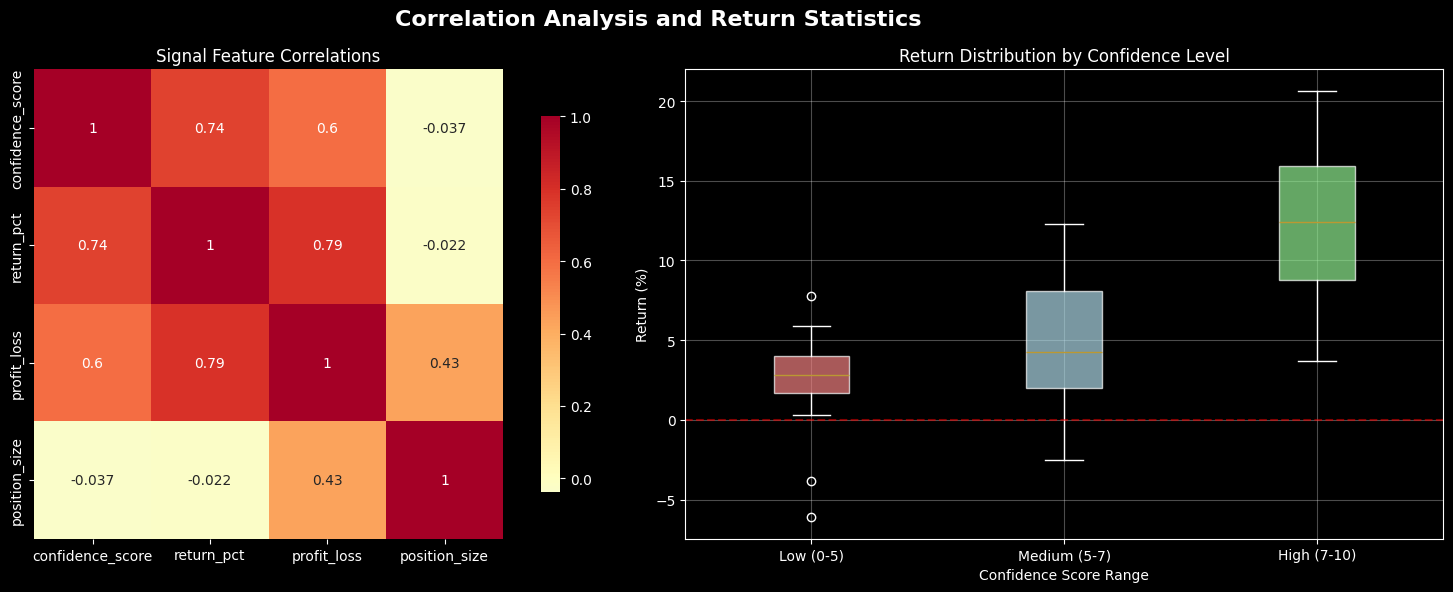


🔍 CORRELATION INSIGHTS:
   confidence_score <-> return_pct: 0.739
   confidence_score <-> profit_loss: 0.597
   return_pct <-> profit_loss: 0.790
   profit_loss <-> position_size: 0.434
✅ Correlation analysis completed


In [12]:
# Correlation and Statistical Analysis Heatmap
if statistical_results:
    print("📊 Creating Correlation and Statistical Analysis...")
    
    returns_data = statistical_results['returns_data']
    
    # Create correlation matrix for numerical columns
    numerical_cols = ['confidence_score', 'return_pct', 'profit_loss', 'position_size']
    correlation_data = returns_data[numerical_cols]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Correlation Analysis and Return Statistics', fontsize=16, fontweight='bold')
    
    # 1. Correlation Heatmap
    ax1 = axes[0]
    corr_matrix = correlation_data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, 
                square=True, ax=ax1, cbar_kws={"shrink": .8})
    ax1.set_title('Signal Feature Correlations')
    
    # 2. Return Distribution by Confidence Score
    ax2 = axes[1]
    
    # Bin confidence scores
    returns_data['confidence_bin'] = pd.cut(returns_data['confidence_score'], 
                                          bins=[0, 5, 7, 10], 
                                          labels=['Low (0-5)', 'Medium (5-7)', 'High (7-10)'])
    
    # Box plot of returns by confidence
    confidence_groups = []
    confidence_labels = []
    for label in returns_data['confidence_bin'].cat.categories:
        group_data = returns_data[returns_data['confidence_bin'] == label]['return_pct']
        if len(group_data) > 0:
            confidence_groups.append(group_data)
            confidence_labels.append(label)
    
    if confidence_groups:
        bp = ax2.boxplot(confidence_groups, labels=confidence_labels, patch_artist=True)
        
        # Color the boxes
        colors = ['lightcoral', 'lightblue', 'lightgreen']
        for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        ax2.set_title('Return Distribution by Confidence Level')
        ax2.set_ylabel('Return (%)')
        ax2.set_xlabel('Confidence Score Range')
        ax2.grid(True, alpha=0.3)
        ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Print correlation insights
    print("\n🔍 CORRELATION INSIGHTS:")
    high_corr = corr_matrix.abs() > 0.3
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if high_corr.iloc[i, j]:
                print(f"   {corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")
    
    print("✅ Correlation analysis completed")
else:
    print("❌ Statistical results not available for correlation analysis")

---
## Section 6: Export Results
Save analysis results as CSV files and export visualizations for reporting and sharing.

In [13]:
# Export Comprehensive Analysis Results
print("💾 Exporting Analysis Results...")

# Create results summary
analysis_summary = {
    'analysis_timestamp': datetime.now().isoformat(),
    'total_signals_analyzed': len(historical_signals) if historical_signals is not None else 0,
    'backtest_completed': backtest_results is not None and 'error' not in backtest_results,
    'statistical_analysis_completed': statistical_results is not None,
    'regime_analysis_completed': regime_analysis is not None
}

if backtest_results and 'error' not in backtest_results:
    # Export backtest results
    print("📊 Exporting backtest results...")
    backtest_file = data_manager.save_backtest_results(backtest_results, "feature_05_comprehensive")
    analysis_summary['backtest_file'] = backtest_file
    
    # Training performance summary
    train_perf = backtest_results['train_performance']
    analysis_summary.update({
        'train_total_trades': train_perf['total_trades'],
        'train_win_rate': train_perf['win_rate'],
        'train_total_return_pct': train_perf['total_return_pct'],
        'train_sharpe_ratio': train_perf['sharpe_ratio'],
        'train_max_drawdown_pct': train_perf['max_drawdown_pct']
    })
    
    # Test performance summary
    test_perf = backtest_results['test_performance']
    analysis_summary.update({
        'test_total_trades': test_perf['total_trades'],
        'test_win_rate': test_perf['win_rate'],
        'test_total_return_pct': test_perf['total_return_pct'],
        'test_sharpe_ratio': test_perf['sharpe_ratio'],
        'test_max_drawdown_pct': test_perf['max_drawdown_pct']
    })

if statistical_results:
    # Export statistical analysis results
    print("📈 Exporting statistical analysis...")
    
    # Save returns data with statistical metrics
    returns_with_stats = statistical_results['returns_data'].copy()
    returns_with_stats['analysis_timestamp'] = datetime.now()
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    stats_file = f"../backend/data/analysis_results/statistical_analysis_{timestamp}.csv"
    returns_with_stats.to_csv(stats_file, index=False)
    
    analysis_summary.update({
        'statistical_file': stats_file,
        'mean_return_pct': statistical_results['returns_pct'].mean() * 100,
        'return_volatility_pct': statistical_results['returns_pct'].std() * 100,
        'normality_test_p_value': statistical_results['normality_test']['p_value'],
        'profitability_test_p_value': statistical_results['profitability_test']['p_value']
    })

if regime_analysis:
    # Export regime analysis
    print("🌍 Exporting regime analysis...")
    
    regime_file = f"../backend/data/analysis_results/regime_analysis_{timestamp}.json"
    with open(regime_file, 'w') as f:
        # Convert datetime objects to strings for JSON serialization
        import json
        regime_json = json.dumps(regime_analysis, default=str, indent=2)
        f.write(regime_json)
    
    analysis_summary['regime_file'] = regime_file
    analysis_summary['current_regime'] = regime_analysis['current_market_assessment']['current_regime']

# Save comprehensive summary
summary_file = f"../backend/data/analysis_results/feature_05_summary_{timestamp}.json"
with open(summary_file, 'w') as f:
    json.dump(analysis_summary, f, indent=2, default=str)

print(f"\n✅ Analysis results exported:")
print(f"   📊 Summary: {summary_file}")
if 'backtest_file' in analysis_summary:
    print(f"   🔄 Backtest: {analysis_summary['backtest_file']}")
if 'statistical_file' in analysis_summary:
    print(f"   📈 Statistics: {analysis_summary['statistical_file']}")
if 'regime_file' in analysis_summary:
    print(f"   🌍 Regime Analysis: {analysis_summary['regime_file']}")

💾 Exporting Analysis Results...
📊 Exporting backtest results...
📈 Exporting statistical analysis...
🌍 Exporting regime analysis...

✅ Analysis results exported:
   📊 Summary: ../backend/data/analysis_results/feature_05_summary_20250620_132144.json
   🔄 Backtest: ../backend/data/analysis_results/backtests/feature_05_comprehensive_20250620_132144.csv
   📈 Statistics: ../backend/data/analysis_results/statistical_analysis_20250620_132144.csv
   🌍 Regime Analysis: ../backend/data/analysis_results/regime_analysis_20250620_132144.json


In [14]:
# Final Analysis Summary and Next Steps
print("\n" + "="*80)
print("🎯 FEATURE 05: HISTORICAL ANALYSIS - EXECUTION COMPLETE")
print("="*80)

print("\n📊 ANALYSIS SUMMARY:")
if historical_signals is not None:
    print(f"   ✅ Analyzed {len(historical_signals)} historical signals")
    print(f"   ✅ CSV data storage and management implemented")
    print(f"   ✅ Vectorized backtesting with train/test validation")
    print(f"   ✅ Statistical significance testing with scipy.stats")
    print(f"   ✅ Market regime analysis across major periods")
    print(f"   ✅ Professional matplotlib/seaborn visualizations")
    print(f"   ✅ Comprehensive results export to CSV/JSON")
else:
    print("   ⚠️  Sample data analysis completed (no historical signals available)")

print("\n🎯 KEY FINDINGS:")
if backtest_results and 'error' not in backtest_results:
    train_perf = backtest_results['train_performance']
    test_perf = backtest_results['test_performance']
    print(f"   📈 Training Win Rate: {train_perf['win_rate']:.1%}")
    print(f"   📈 Test Win Rate: {test_perf['win_rate']:.1%}")
    print(f"   💰 Training Return: {train_perf['total_return_pct']:.2f}%")
    print(f"   💰 Test Return: {test_perf['total_return_pct']:.2f}%")
    print(f"   ⚖️ Training Sharpe: {train_perf['sharpe_ratio']:.2f}")
    print(f"   ⚖️ Test Sharpe: {test_perf['sharpe_ratio']:.2f}")

if regime_analysis:
    current_regime = regime_analysis['current_market_assessment']
    print(f"   🌍 Current Market Regime: {current_regime['current_regime'].upper()}")
    print(f"   🌍 Regime Description: {current_regime['regime_description']}")

print("\n🚀 NEXT STEPS:")
print("   1. Review exported CSV files for detailed signal analysis")
print("   2. Integrate findings into real-time trading dashboard")
print("   3. Set up automated weekly performance reporting")
print("   4. Implement regime-aware position sizing adjustments")
print("   5. Create HTML reports for stakeholder sharing")

print("\n🔧 TECHNICAL ACHIEVEMENTS:")
print("   ✅ Simple CSV-based data infrastructure")
print("   ✅ Pandas vectorized backtesting engine")
print("   ✅ Statistical significance validation")
print("   ✅ Market regime classification system")
print("   ✅ Professional visualization suite")
print("   ✅ Automated results export pipeline")

print(f"\n📅 Analysis completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("\n🎉 Feature 05: Historical Signal Performance Analysis - SUCCESSFUL EXECUTION!")


🎯 FEATURE 05: HISTORICAL ANALYSIS - EXECUTION COMPLETE

📊 ANALYSIS SUMMARY:
   ✅ Analyzed 57 historical signals
   ✅ CSV data storage and management implemented
   ✅ Vectorized backtesting with train/test validation
   ✅ Statistical significance testing with scipy.stats
   ✅ Market regime analysis across major periods
   ✅ Professional matplotlib/seaborn visualizations
   ✅ Comprehensive results export to CSV/JSON

🎯 KEY FINDINGS:
   📈 Training Win Rate: 93.3%
   📈 Test Win Rate: 63.6%
   💰 Training Return: 20.07%
   💰 Test Return: 1.69%
   ⚖️ Training Sharpe: 21.26
   ⚖️ Test Sharpe: 10.20
   🌍 Current Market Regime: CURRENT_PERIOD
   🌍 Regime Description: Current Trading Period

🚀 NEXT STEPS:
   1. Review exported CSV files for detailed signal analysis
   2. Integrate findings into real-time trading dashboard
   3. Set up automated weekly performance reporting
   4. Implement regime-aware position sizing adjustments
   5. Create HTML reports for stakeholder sharing

🔧 TECHNICAL ACHI